In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread, imresize
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from numpy.random import normal, multivariate_normal

def get_data(samples_per_class):
    n_concentrated = int(0.7 * samples_per_class)
    n_scattered = int(0.3 * samples_per_class)
    data_1 = np.concatenate((multivariate_normal([-25.0, 25.0], [[65.0, 0.0],[0.0, 65.0]], n_concentrated),
                              multivariate_normal([0.0, 0.0], [[140.0, 0.0],[0.0, 240.0]], n_scattered)))
    data_2 = np.concatenate((multivariate_normal([25.0, 25.0], [[35.0, 0.0],[0.0, 255.0]], n_concentrated),
                              multivariate_normal([0.0, 0.0], [[140.0, 0.0],[0.0, 140.0]], n_scattered)))
    data_3 = np.concatenate((multivariate_normal([-10.0, -25.0], [[200.0, 0.0],[0.0, 255.0]], n_concentrated),
                              multivariate_normal([0.0, 0.0], [[140.0, 0.0],[0.0, 140.0]], n_scattered)))
    return data_1, data_2, data_3

def scatter_plot_data(data_1, data_2, data_3):
    # Train data (concentrated + some scattered)
    plt.scatter(data_1[:, 0], data_1[:, 1], color='r')
    plt.scatter(data_2[:, 0], data_2[:, 1], color='g')
    plt.scatter(data_3[:, 0], data_3[:, 1], color='b')
    lim = 60
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.show()

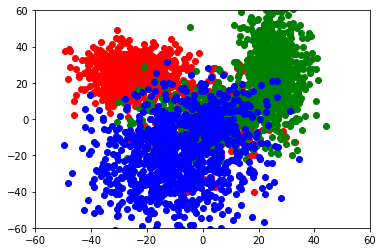

In [4]:
# Train data
train_samples_per_class = 1000
n_train = train_samples_per_class * 3
train_1, train_2, train_3 = get_data(train_samples_per_class)
scatter_plot_data(train_1, train_2, train_3)

X_tr = np.concatenate((train_1, train_2, train_3))
y_tr = np.concatenate((np.full((train_samples_per_class), 1, dtype=int), 
                       np.full((train_samples_per_class), 2, dtype=int),
                       np.full((train_samples_per_class), 3, dtype=int)))

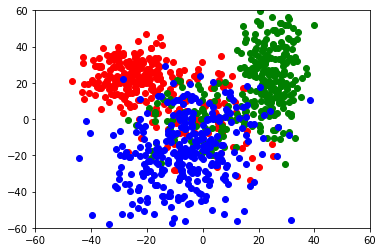

In [5]:
# Test data
test_samples_per_class = 300
n_test = test_samples_per_class * 3
test_1, test_2, test_3 = get_data(test_samples_per_class)
scatter_plot_data(test_1, test_2, test_3)

X_te = np.concatenate((test_1, test_2, test_3))
y_te = np.concatenate((np.full((test_samples_per_class), 1, dtype=int), 
                       np.full((test_samples_per_class), 2, dtype=int),
                       np.full((test_samples_per_class), 3, dtype=int)))


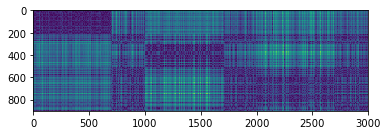

train (3000, 2) (3000,)
test (900, 2) (900,)
dists (900, 3000)


In [8]:
from cs231n.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()

classifier.train(X_tr, y_tr)
dists = classifier.compute_distances_no_loops(X_te)
plt.imshow(dists, interpolation='none')
plt.show()

print("train", X_tr.shape, y_tr.shape)
print("test", X_te.shape, y_te.shape)
print("dists", dists.shape)

In [9]:
y_test_pred = classifier.predict_labels(dists, k=2)
num_correct = np.sum(y_test_pred == y_te)
accuracy = float(num_correct) / n_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, n_test, accuracy))


Got 629 / 900 correct => accuracy: 0.698889
